# Assignment 2: Exploration and Preprocessing of Data


**Submitted by: Indronil Bhattacharjee**

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('C:\\Users\\ibpri\\Downloads\\default-of-credit-card-clients.csv', header=1)

### Question 1. Data Exploration

**Task 1a:** For each amount-of-bill-statement attribute (X12-X17), calculate its average, standard deviation, minimum, and maximum values.

In [64]:
# Task 1a: Calculate statistics for amount-of-bill-statement attributes
bill_attributes = data.iloc[:, 12:18]  # Columns 12-17
attribute_stats = bill_attributes.describe()
print("Statistics")
print("="*50,"\n")
print(attribute_stats)

Statistics

           BILL_AMT1      BILL_AMT2     BILL_AMT3      BILL_AMT4   
count   30000.000000   30000.000000  3.000000e+04   30000.000000  \
mean    51223.330900   49179.075167  4.701315e+04   43262.948967   
std     73635.860576   71173.768783  6.934939e+04   64332.856134   
min   -165580.000000  -69777.000000 -1.572640e+05 -170000.000000   
25%      3558.750000    2984.750000  2.666250e+03    2326.750000   
50%     22381.500000   21200.000000  2.008850e+04   19052.000000   
75%     67091.000000   64006.250000  6.016475e+04   54506.000000   
max    964511.000000  983931.000000  1.664089e+06  891586.000000   

           BILL_AMT5      BILL_AMT6  
count   30000.000000   30000.000000  
mean    40311.400967   38871.760400  
std     60797.155770   59554.107537  
min    -81334.000000 -339603.000000  
25%      1763.000000    1256.000000  
50%     18104.500000   17071.000000  
75%     50190.500000   49198.250000  
max    927171.000000  961664.000000  


**Task 1b:** Compute the covariance and correlation between those attribute pairs.

In [65]:
# Task 1b: Compute covariance and correlation
covariance_matrix = bill_attributes.cov()
correlation_matrix = bill_attributes.corr()
print("\nCovariance Matrix\n","="*50,"\n",covariance_matrix)
print("\nCorrelation Matrix\n","="*50,"\n",correlation_matrix)


Covariance Matrix
               BILL_AMT1     BILL_AMT2     BILL_AMT3     BILL_AMT4   
BILL_AMT1  5.422240e+09  4.986670e+09  4.556511e+09  4.075286e+09  \
BILL_AMT2  4.986670e+09  5.065705e+09  4.582086e+09  4.086508e+09   
BILL_AMT3  4.556511e+09  4.582086e+09  4.809338e+09  4.122238e+09   
BILL_AMT4  4.075286e+09  4.086508e+09  4.122238e+09  4.138716e+09   
BILL_AMT5  3.714795e+09  3.720401e+09  3.726780e+09  3.677105e+09   
BILL_AMT6  3.519876e+09  3.524868e+09  3.524247e+09  3.451762e+09   

              BILL_AMT5     BILL_AMT6  
BILL_AMT1  3.714795e+09  3.519876e+09  
BILL_AMT2  3.720401e+09  3.524868e+09  
BILL_AMT3  3.726780e+09  3.524247e+09  
BILL_AMT4  3.677105e+09  3.451762e+09  
BILL_AMT5  3.696294e+09  3.425914e+09  
BILL_AMT6  3.425914e+09  3.546692e+09  

Correlation Matrix
            BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6
BILL_AMT1   1.000000   0.951484   0.892279   0.860272   0.829779   0.802650
BILL_AMT2   0.951484   1.000000   0.928326 

**Task 1c:** Display the histogram for each of those quantitative attributes by discretizing it into 5 separate bins and counting the frequency for each bin.

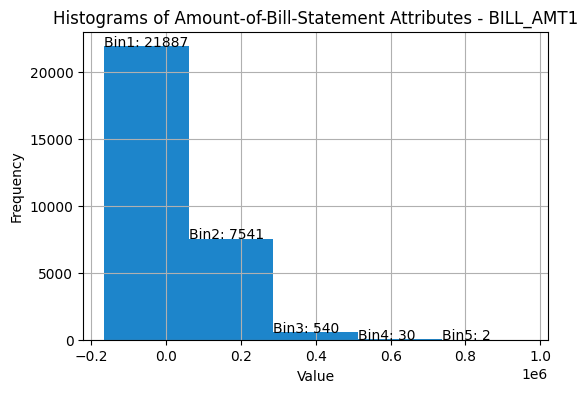

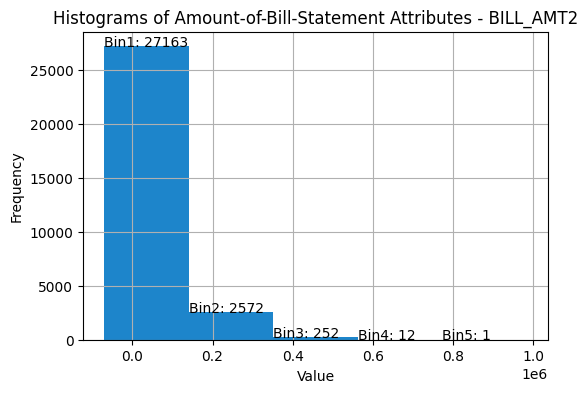

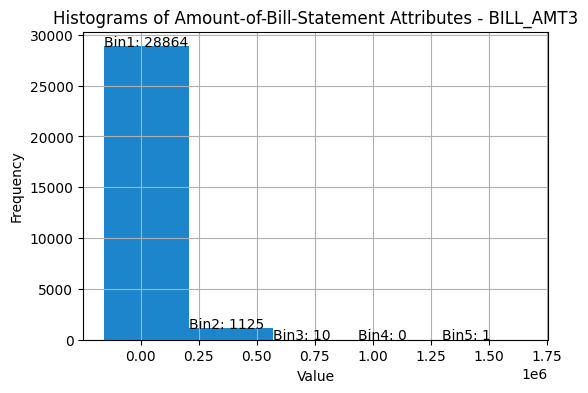

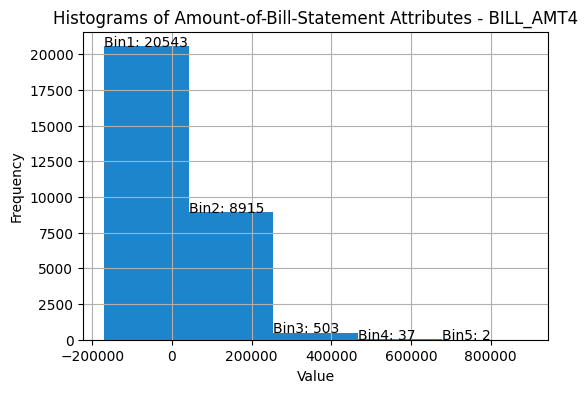

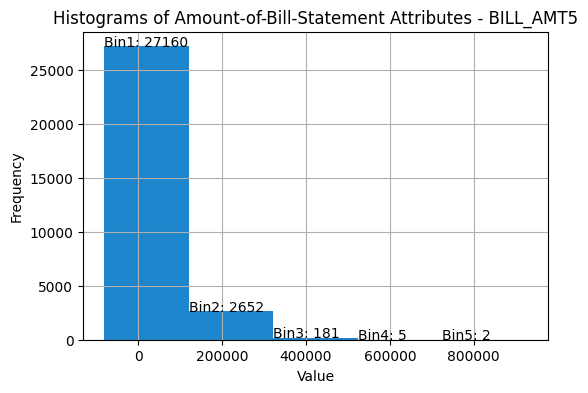

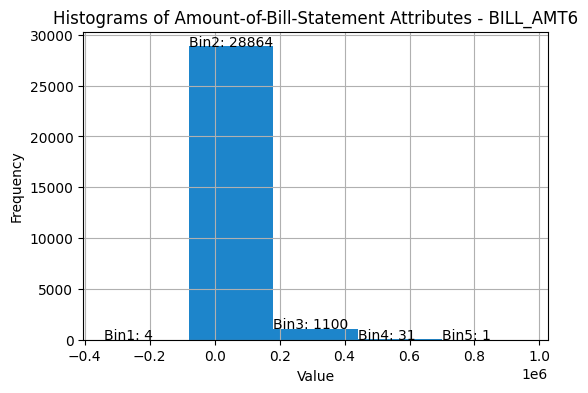

In [66]:
# Task 1c: Display histograms for each attribute
for num in range(1,7):
    plt.figure(figsize=(6, 4))
    bill_attributes["BILL_AMT"+str(num)].hist(bins=5, alpha=0.7)
    n, bins, _ = plt.hist(bill_attributes["BILL_AMT"+str(num)], bins=5, alpha=0.7, color='#007acc')
    plt.title("Histograms of Amount-of-Bill-Statement Attributes - BILL_AMT"+str(num))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    for i in range(len(n)):
        plt.annotate(f'{"Bin"+ str(i+1) + ": "+ str(int(n[i]))}', (bins[i], n[i]))
    plt.show()

**Task 1d:** Display a boxplot to show the distribution of values for each of those attributes and finding out outliers

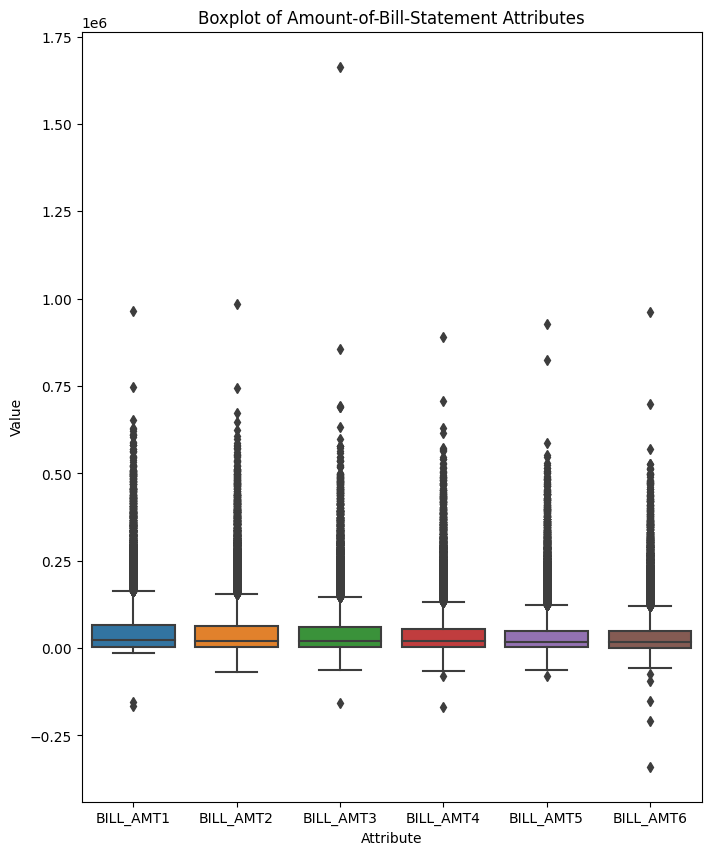

In [67]:
# Task 1d: Display boxplots
plt.figure(figsize=(8, 10))
sns.boxplot(data=bill_attributes)
plt.title("Boxplot of Amount-of-Bill-Statement Attributes")
plt.xlabel("Attribute")
plt.ylabel("Value")
plt.show()

Suspected outliers are identified by the common rule of thumb of singling out values falling at least 1.5 x IQR above the third quartile or below the first quartile.

In [68]:
# Task 1d: Checking outliers
# Function to detect outliers using IQR
def find_outliers_iqr(data_column):
    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data_column < lower_bound) | (data_column > upper_bound)
    return outliers

# Find outliers for each attribute
outliers_dict = {}
for col in bill_attributes.columns:
    outliers_dict[col] = find_outliers_iqr(bill_attributes[col])

for col, outliers in outliers_dict.items():
    print(f"Attribute {col}: {outliers.sum()} outliers")

Attribute BILL_AMT1: 2400 outliers
Attribute BILL_AMT2: 2395 outliers
Attribute BILL_AMT3: 2469 outliers
Attribute BILL_AMT4: 2622 outliers
Attribute BILL_AMT5: 2725 outliers
Attribute BILL_AMT6: 2693 outliers


**Task 1e:** Consider the four attributes X12-X15. For each pair of those four attributes, use a scatter plot to visualize their joint distribution.

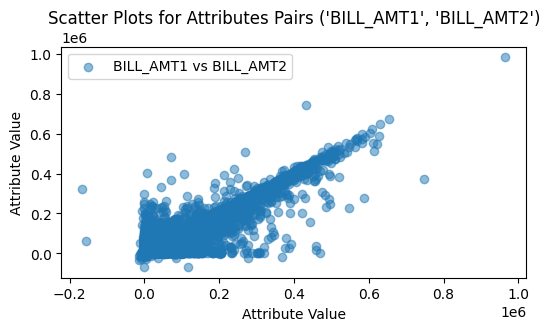

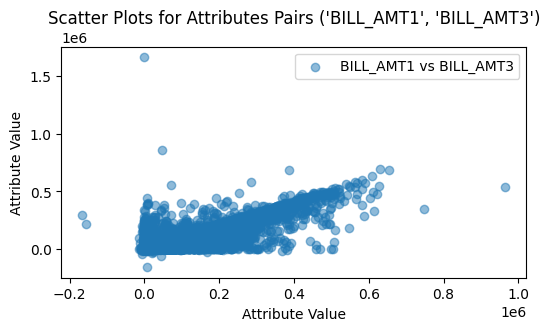

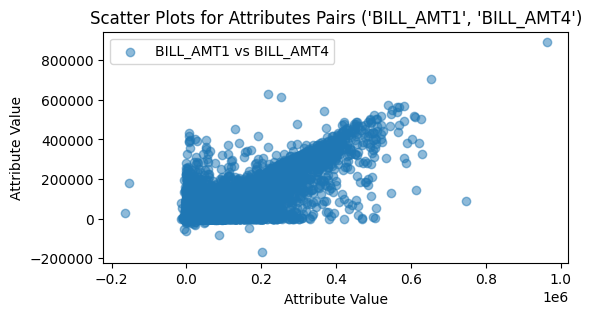

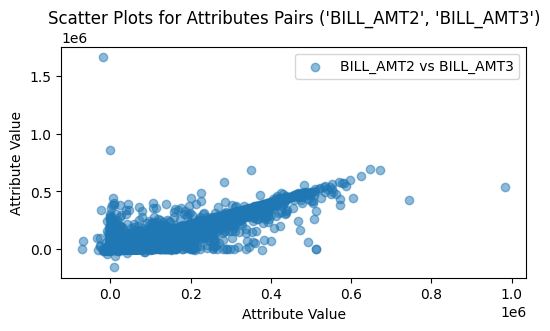

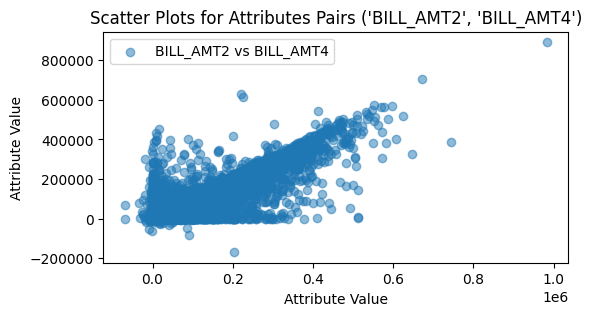

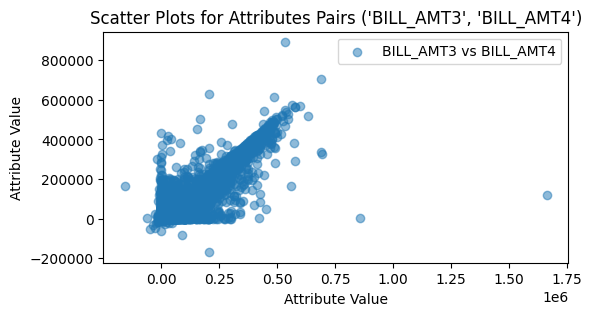

In [69]:
# Task 1e: Scatter plots for attribute pairs X12-X15
scatter_pairs = [('BILL_AMT1', 'BILL_AMT2'), ('BILL_AMT1', 'BILL_AMT3'), ('BILL_AMT1', 'BILL_AMT4'),
                 ('BILL_AMT2', 'BILL_AMT3'), ('BILL_AMT2', 'BILL_AMT4'), ('BILL_AMT3', 'BILL_AMT4')]

for pair in scatter_pairs:
    plt.figure(figsize=(6, 3))
    plt.scatter(data[pair[0]], data[pair[1]], alpha=0.5, label=f'{pair[0]} vs {pair[1]}')
    plt.title("Scatter Plots for Attributes Pairs " + str(pair))
    plt.xlabel("Attribute Value")
    plt.ylabel("Attribute Value")
    plt.legend()
    plt.show()


Accordingto the scatter plots for attribute pairs X12-X15 ('BILL_AMT1', 'BILL_AMT2'), ('BILL_AMT1', 'BILL_AMT3'), ('BILL_AMT1', 'BILL_AMT4'), ('BILL_AMT2', 'BILL_AMT3'), ('BILL_AMT2', 'BILL_AMT4'), ('BILL_AMT3', 'BILL_AMT4'), we observe positive correlations. For all of the pairs, the values of X increase as the values of Y increase.

### Question 2. Data Preprocessing

**Task 2a:** Standardize the attributes X1, X5, and X12-X23.

The attributes (Age, Limit Balance, Bill Amount 1-6, Pay Amount 1-6) are standardized using Standard Scalar.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Task 2a: Standardize the specified attributes
attributes_to_standardize = ['LIMIT_BAL', 'AGE'] + ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1', 'PAY_AMT2','PAY_AMT3', 'PAY_AMT4','PAY_AMT5','PAY_AMT6']
scaler = StandardScaler()
data[attributes_to_standardize] = scaler.fit_transform(data[attributes_to_standardize])

**Task 2b:** Create a data sample of size 1000 which is randomly selected (without replacement) from the original data.

In [71]:
# Task 2b: Create a random data sample of size 1000
random_sample = data.sample(n=1000, replace=False)
print(random_sample.head())

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE       AGE  PAY_0  PAY_2   
24207  24208  -0.134759    1          2         2 -1.137534      0      0  \
11997  11998  -0.597202    1          2         2 -0.161156      1      2   
24421  24422   0.558907    1          2         1 -0.161156      0      0   
29431  29432  -0.905498    1          2         2 -0.595102     -1      0   
2382    2383   0.867203    1          1         1  1.683111     -1     -1   

       PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2   
24207      0      0  ...   1.638304   1.570109   1.675970 -0.100440  3.084954  \
11997      0     -1  ...  -0.358935   0.546097   0.566154 -0.341942 -0.170186   
24421      0      0  ...   3.101221   2.487141   2.259987  0.261814  0.220431   
29431      0      2  ...  -0.605983  -0.587527  -0.652724 -0.263453 -0.159162   
2382      -1     -1  ...  -0.667927  -0.659391  -0.423769 -0.315075 -0.239933   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  def

**Task 2c:** Create a data sample of size 1000 which is randomly selected (without replacement) from the original data such that the default labels are represented equally (500 instances with default = 1 and 500 instances with default = 0) and use parallel coordinates to visualize this data sample based on attributes X2-X11.


default payment next month
0    500
1    500
Name: count, dtype: int64


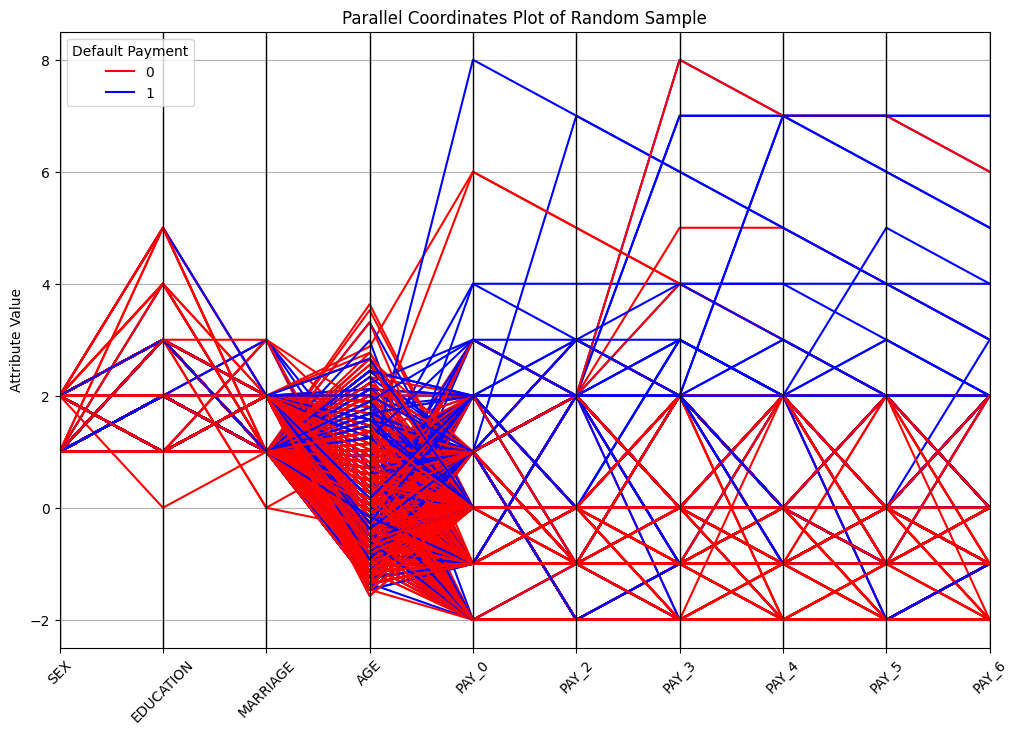

In [72]:
from pandas.plotting import parallel_coordinates as parallel

# Task 2c: Create a balanced data sample of size 1000
default_0 = data[data['default payment next month'] == 0].sample(n=500, replace=False)
default_1 = data[data['default payment next month'] == 1].sample(n=500, replace=False)
balanced_sample = pd.concat([default_0, default_1])
print(balanced_sample['default payment next month'].value_counts())

# Create a parallel coordinates plot
attributes_to_visualize = random_sample.iloc[:, 2:12]
plt.figure(figsize=(12, 8))
parallel(random_sample[['default payment next month'] + list(attributes_to_visualize.columns)],'default payment next month',color=('red', 'blue'))
plt.title("Parallel Coordinates Plot of Random Sample")
plt.ylabel("Attribute Value")
plt.xticks(rotation=45)
plt.legend(title="Default Payment", loc="upper left")
plt.show()

**Task 2d:** Generate a random sample of size 1000 from the original data, then use Principal component analysis (PCA) to reduce the number of attributes by projecting the data
sample from its original high-dimensional space into a lower-dimensional space. In this case, reduce the dimension from 23 to 2 for visualization using a scatterplot.

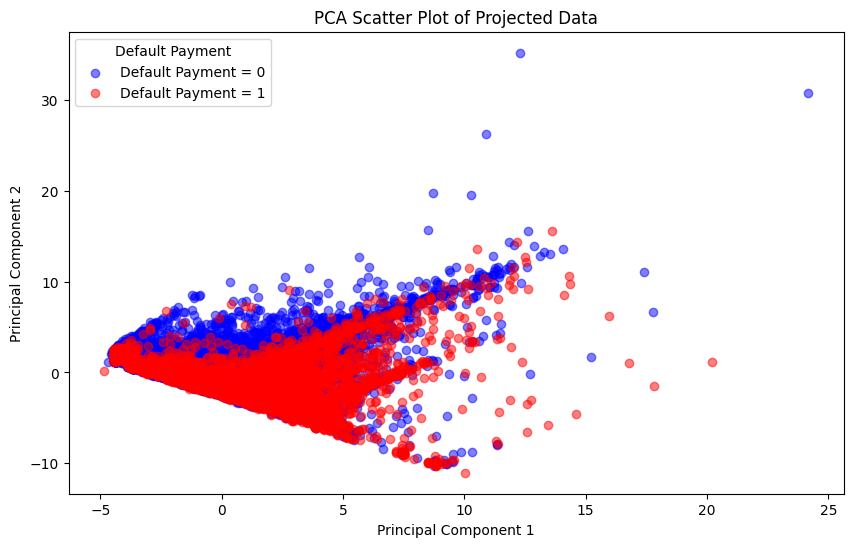

In [73]:
# Task 2d: PCA for dimensionality reduction and scatter plot
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data.iloc[:, 1:24])
plt.figure(figsize=(10, 6))
# Scatter plot for default payment = 0
plt.scatter(
    pca_result[data['default payment next month'] == 0, 0],
    pca_result[data['default payment next month'] == 0, 1],
    c='blue', label='Default Payment = 0', alpha=0.5)

# Scatter plot for default payment = 1
plt.scatter(
    pca_result[data['default payment next month'] == 1, 0],
    pca_result[data['default payment next month'] == 1, 1],
    c='red', label='Default Payment = 1', alpha=0.5)

plt.title("PCA Scatter Plot of Projected Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Default Payment", loc="upper left")
plt.show()